<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Outliers_for_slides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pylab as pl

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb_slides.mplstyle")

In [0]:
N = 200

In [0]:
x = np.arange(N)
np.random.seed(123)
y = np.random.randn(N)

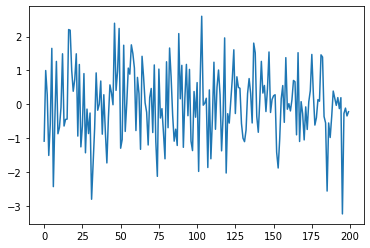

In [0]:
pl.plot(x,y)

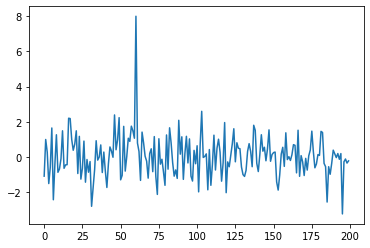

In [0]:
y[60] = 8
pl.plot(x,y)

(array([ 5., 29., 75., 64., 24.,  2.,  0.,  0.,  0.,  1.]),
 array([-3.23105501, -2.10794951, -0.98484401,  0.13826149,  1.261367  ,
         2.3844725 ,  3.507578  ,  4.6306835 ,  5.753789  ,  6.8768945 ,
         8.        ]),
 <a list of 10 Patch objects>)

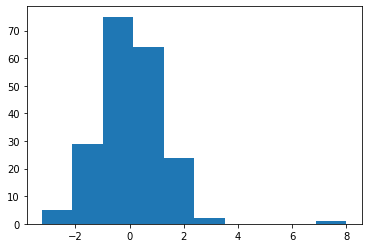

In [0]:
pl.hist(y)

In [0]:
def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size

    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges

    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points =  np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
    change_points = change_points[i_cp:]

    return edges[change_points]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


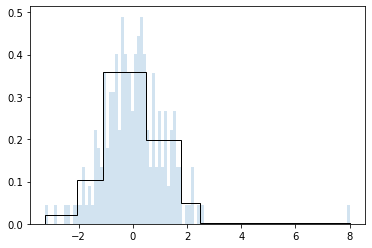

In [0]:
H1 = hist(y, bins=100, histtype='stepfilled',
          alpha=0.2, normed=True)
# plot an adaptive-width histogram on top
H2 = hist(y, bins=bayesian_blocks(y), color='black',
          histtype='step', normed=True)

In [0]:
np.random.seed(123)
y0 = 0
y = np.zeros(N)
d = np.random.randn(N + 1)
for i in range(1, N):
  y[i] +=  y[i-1] + d[i] 



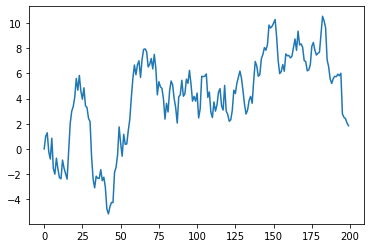

In [0]:
pl.plot(x,y)

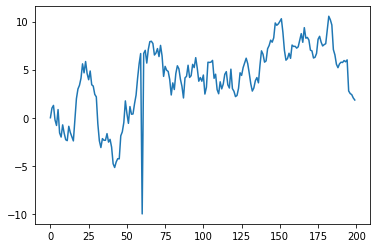

In [0]:
y[60] = -10
pl.plot(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


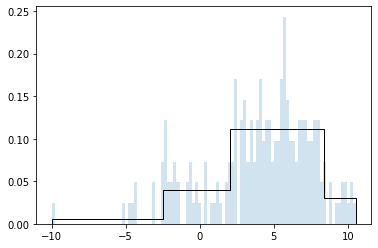

In [0]:
H1 = hist(y, bins=100, histtype='stepfilled',
          alpha=0.2, normed=True)
# plot an adaptive-width histogram on top
H2 = hist(y, bins=bayesian_blocks(y), color='black',
          histtype='step', normed=True)

In [0]:
import pandas as pd
df = pd.DataFrame({'x':x, 'y':y})

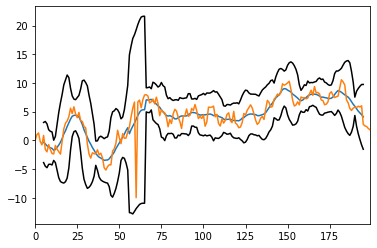

In [0]:
df['y'].rolling(window=10, center=True).mean().plot()
df['yp'] = df['y'].rolling(window=10, center=True).mean() + 3 * df['y'].rolling(window=10, center=True).std()
df['ym'] = df['y'].rolling(window=10, center=True).mean() - 3 * df['y'].rolling(window=10, center=True).std()
df['yp'].plot(c='k')
df['ym'].plot(c='k')
df['y'].plot()


0.022407068903568483


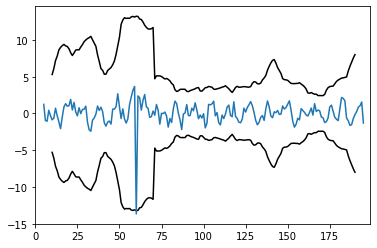

In [0]:
df['resids'] = df['y'] - df['y'].rolling(window=10, center=True).mean()
print(df['resids'].mean())
df['ypres'] = 3 * df['y'].rolling(window=20, center=True).std()
df['ymres'] = -3 * df['y'].rolling(window=20, center=True).std()
df['ypres'].plot(c='k')
df['ymres'].plot(c='k')
df['resids'].plot()


In [0]:
print(df[df.resids.abs() > df.ymres.abs()])

     x     y         yp         ym     resids      ypres      ymres
60  60 -10.0  19.240351 -11.905215 -13.667568  13.218176 -13.218176


In [0]:
Model dependent: 


SyntaxError: ignored

In [0]:
bb

NameError: ignored

<Figure size 360x360 with 0 Axes>

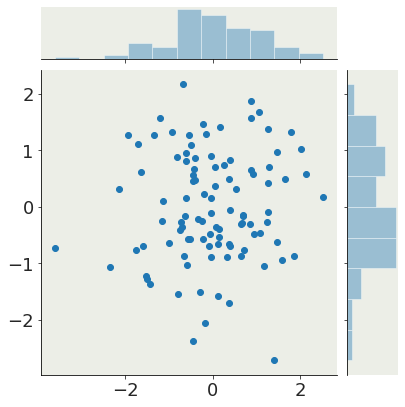

In [0]:
import seaborn as sns
pl.figure(figsize=(5,5))
np.random.seed(345)
x = np.random.randn(100)
y = np.random.randn(100)

ox = np.random.randn(1)
oy = np.random.randn(1) + 5

#sns.jointplot(x, y);
g = g.plot_joint(sns.scatterplot, color=".5")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")

[]

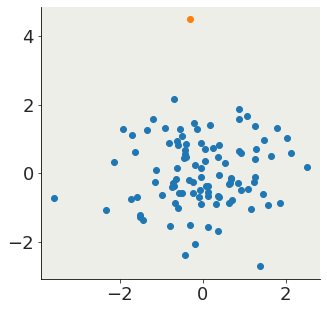

In [0]:
import seaborn as sns
pl.figure(figsize=(5,5))
np.random.seed(345)
x = np.random.randn(100)
y = np.random.randn(100)

ox = np.random.randn(1)
oy = np.random.randn(1) + 5

pl.plot(x, y, 'o')
pl.plot(ox, oy, 'o')
pl.plot()